# Flight Price Prediction

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.     Size of training set: 10683 records Size of test set: 2671 records FEATURES: Airline: The name of the airline. Date_of_Journey: The date of the journey Source: The source from which the service begins. Destination: The destination where the service ends. Route: The route taken by the flight to reach the destination. Dep_Time: The time when the journey starts from the source. Arrival_Time: Time of arrival at the destination. Duration: Total duration of the flight. Total_Stops: Total stops between the source and destination. Additional_Info: Additional information about the flight Price: The price of the ticket

In [170]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [171]:
train_df = pd.read_excel("D:\DataSets\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")

test_df =pd.read_excel("D:\DataSets\Flight_Ticket_Participant_Datasets\Test_set.xlsx")

In [172]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [173]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [174]:
big_df  = train_df.append(test_df,sort=False)

C:\Users\ssart\AppData\Local\Temp\ipykernel_12856\3410060400.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_df  = train_df.append(test_df,sort=False)


In [175]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [176]:
big_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [177]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

## Feature Engineering

In [178]:
big_df['Date'] = big_df['Date_of_Journey'].str.split('/').str[0]

In [179]:
big_df['Month'] = big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year'] = big_df['Date_of_Journey'].str.split('/').str[2]

In [180]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [181]:
big_df = big_df.drop(['Date_of_Journey'],axis=1)

In [182]:
big_df['Date'] = big_df['Date'].astype(int)
big_df['Month'] = big_df['Month'].astype(int)
big_df['Year'] = big_df['Year'].astype(int)

In [183]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [184]:
big_df['Arrival_Time'] = big_df['Arrival_Time'].str.split(' ').str[0]

In [185]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [186]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [187]:
big_df['Total_Stops'] = big_df['Total_Stops'].fillna('1 stop')

In [188]:
big_df['Total_Stops'] = big_df['Total_Stops'].replace('non-stop','0 stop')

In [189]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [190]:
big_df['Total_Stops'] = big_df['Total_Stops'].str.split(' ').str[0]

In [191]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [192]:
big_df['Total_Stops'] = big_df['Total_Stops'].astype('int')

In [193]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [194]:
big_df['Arrival_Hour'] = big_df['Arrival_Time'].str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arrival_Time'].str.split(':').str[1]

In [195]:
big_df['Arrival_Hour'] = big_df['Arrival_Hour'].astype('int')
big_df['Arrival_Minute'] = big_df['Arrival_Minute'].astype('int')

In [196]:
big_df = big_df.drop(['Arrival_Time'],axis=1)

In [197]:
big_df['Departure_Hour'] = big_df['Dep_Time'].str.split(':').str[0]
big_df['Departure_Minute'] = big_df['Dep_Time'].str.split(':').str[1]

In [198]:
big_df['Departure_Hour'] = big_df['Departure_Hour'].astype('int')
big_df['Departure_Minute'] = big_df['Departure_Minute'].astype('int')

In [199]:
big_df = big_df.drop(['Dep_Time'],axis=1)

In [200]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [201]:
big_df['Duration_Hour'] = big_df['Duration'].str.split(' ').str[0]
big_df['Duration_Minute'] = big_df['Duration'].str.split(' ').str[1]


In [202]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4h,45m


In [203]:
big_df['Duration_Hour']= big_df['Duration_Hour'].str.split('h').str[0]
big_df['Duration_Minute'] = big_df['Duration_Minute'].str.split('m').str[0]


In [204]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [205]:
big_df['Duration_Minute'] = big_df['Duration_Minute'].fillna(0)

In [206]:
big_df['Duration_Hour'] = big_df['Duration_Hour'].fillna(0)

In [207]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [208]:
big_df['Route_1'] = big_df['Route'].str.split('→ ').str[0]
big_df['Route_2'] = big_df['Route'].str.split('→ ').str[1]
big_df['Route_3'] = big_df['Route'].str.split('→ ').str[2]
big_df['Route_4'] = big_df['Route'].str.split('→ ').str[3]
big_df['Route_5'] = big_df['Route'].str.split('→ ').str[4]

In [209]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,...,10,22,20,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,...,15,5,50,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,...,25,9,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,...,30,18,5,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,...,35,16,50,4,45,BLR,NAG,DEL,NaN,NaN


In [210]:
big_df['Route_1'].fillna('None',inplace=True)
big_df['Route_2'].fillna('None',inplace=True)
big_df['Route_3'].fillna('None',inplace=True)
big_df['Route_4'].fillna('None',inplace=True)
big_df['Route_5'].fillna('None',inplace=True)

In [211]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,...,10,22,20,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,...,15,5,50,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,...,25,9,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,...,30,18,5,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,...,35,16,50,4,45,BLR,NAG,DEL,None,None


In [212]:
big_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  1
Duration               0
Total_Stops            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
Duration_Hour          0
Duration_Minute        0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
dtype: int64

C:\Users\ssart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

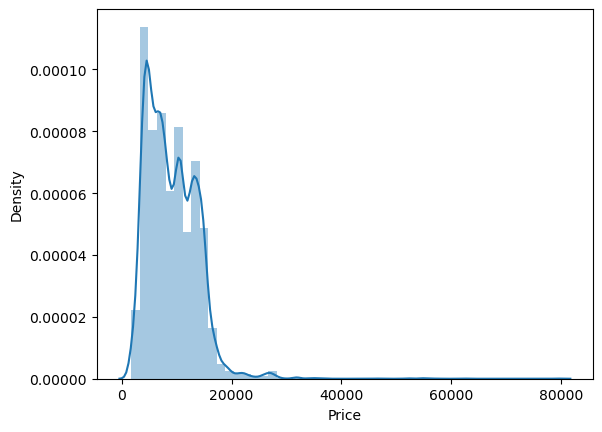

In [213]:
sns.distplot(big_df['Price'])

In [214]:
train_df.mean()

C:\Users\ssart\AppData\Local\Temp\ipykernel_12856\1834078839.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.mean()


Price    9087.064121
dtype: float64

In [215]:
big_df['Price'].mean(),big_df['Price'].max(),big_df['Price'].median(),big_df['Price'].mode()

(9087.064120565385,
 79512.0,
 8372.0,
 0    10262.0
 Name: Price, dtype: float64)

In [216]:
big_df['Price'].fillna(big_df['Price'].median(),inplace=True)

In [217]:
big_df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Duration            0
Total_Stops         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Duration_Hour       0
Duration_Minute     0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [218]:
from sklearn.preprocessing import LabelEncoder

In [219]:
encoder = LabelEncoder()
big_df['Airline'] = encoder.fit_transform(big_df['Airline'])
big_df['Source'] = encoder.fit_transform(big_df['Source'])
big_df['Destination'] = encoder.fit_transform(big_df['Destination'])
big_df['Route_1'] = encoder.fit_transform(big_df['Route_1'])
big_df['Route_2'] = encoder.fit_transform(big_df['Route_2'])
big_df['Route_3'] = encoder.fit_transform(big_df['Route_3'])
big_df['Route_4'] = encoder.fit_transform(big_df['Route_4'])
big_df['Route_5'] = encoder.fit_transform(big_df['Route_5'])


In [220]:
big_df['Additional_Info'] = encoder.fit_transform(big_df['Additional_Info'])

In [221]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,BLR → DEL,2h 50m,0,8,3897.0,24,3,...,10,22,20,2,50,0,13,24,12,4
1,1,3,0,CCU → IXR → BBI → BLR,7h 25m,2,8,7662.0,1,5,...,15,5,50,7,25,2,25,1,3,4
2,4,2,1,DEL → LKO → BOM → COK,19h,2,8,13882.0,9,6,...,25,9,25,19,0,3,32,4,5,4
3,3,3,0,CCU → NAG → BLR,5h 25m,1,8,6218.0,12,5,...,30,18,5,5,25,2,34,3,12,4
4,3,0,5,BLR → NAG → DEL,4h 45m,1,8,13302.0,1,3,...,35,16,50,4,45,0,34,8,12,4


In [222]:
big_df.drop(['Route'],axis=1,inplace=True)

In [223]:
big_df.drop(['Duration'],axis=1,inplace=True)

In [224]:
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2,50,0,13,24,12,4
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,7,25,2,25,1,3,4
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,19,0,3,32,4,5,4
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,5,25,2,34,3,12,4
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,4,45,0,34,8,12,4


In [225]:
big_df['Duration_Minute'] = big_df['Duration_Minute'].astype(int)

In [226]:
big_df['Duration_Hour'] = big_df['Duration_Hour'].str.split('m').str[0]

In [227]:
big_df['Duration_Hour'] = big_df['Duration_Hour'].astype(int)

In [228]:
big_df.dtypes

Airline               int32
Source                int32
Destination           int32
Total_Stops           int32
Additional_Info       int32
Price               float64
Date                  int32
Month                 int32
Year                  int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
Duration_Hour         int32
Duration_Minute       int32
Route_1               int32
Route_2               int32
Route_3               int32
Route_4               int32
Route_5               int32
dtype: object

## Feature Selection

In [229]:
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel

In [230]:
big_df.shape

(13354, 20)

In [231]:
df_train = big_df[0:10683]
df_test = big_df[10683:]

In [232]:
X = df_train.drop(['Price'],axis=1)
y = df_train.Price

In [233]:
X.shape


(10683, 19)

In [234]:
y.shape

(10683,)

In [235]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [236]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [237]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [238]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [239]:
selected_features = X_train.columns[(model.get_support())]

In [240]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Duration_Hour', 'Duration_Minute', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [241]:
X_train = X_train.drop(['Year'],axis=1)

In [242]:
X_test = X_test.drop(['Year'],axis=1)

## Linear Regression

In [243]:
from sklearn.linear_model import LinearRegression

In [244]:
le_reg = LinearRegression()

In [245]:
le_reg.fit(X_train,y_train)

LinearRegression()

In [246]:
le_reg.score(X_train,y_train)

0.49421714900501146

In [247]:
le_reg.intercept_

7939.431750257984

In [248]:
le_reg.coef_

array([ 1.53713774e+02, -1.58480537e+02,  3.55984148e+02,  3.37962691e+03,
        1.79388302e+02, -7.60728814e+01, -3.58857685e+02, -1.38783339e+01,
       -2.47570244e+00,  2.38977464e+01, -3.73023288e+00,  3.18074393e+01,
       -1.01533097e+01, -4.09364101e+02, -9.76456061e+01, -1.45502937e+02,
        3.62619958e+01,  5.61317907e+02])

In [249]:
print('The coefficient of determination R^2 for train set is: {}'.format(le_reg.score(X_train,y_train)))

The coefficient of determination R^2 for train set is: 0.49421714900501146


In [250]:
print('The coefficient of determination R^2 for test set is: {}'.format(le_reg.score(X_test,y_test)))

The coefficient of determination R^2 for test set is: 0.5079142913692207


In [251]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(le_reg,X,y,cv=5)

In [252]:
score.mean()

0.4957982649375413

<AxesSubplot:>

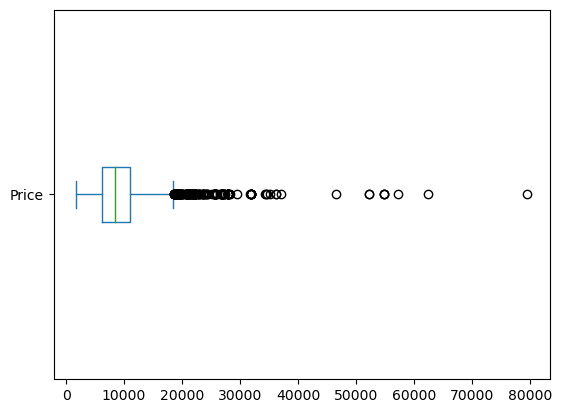

In [253]:
big_df.Price.plot(kind='box',vert = False)

<AxesSubplot:ylabel='Density'>

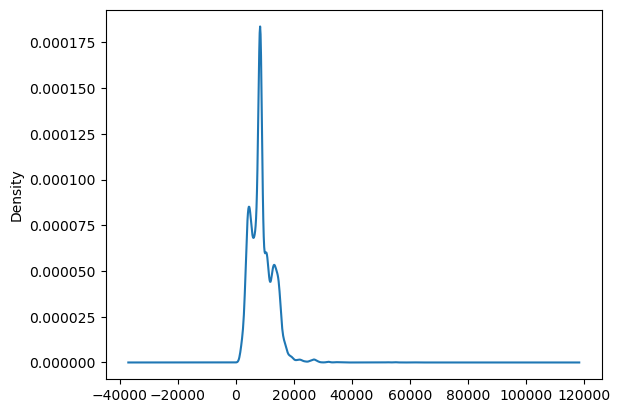

In [254]:
big_df.Price.plot(kind='density')

In [255]:
y_pred = le_reg.predict(X_test)

C:\Users\ssart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

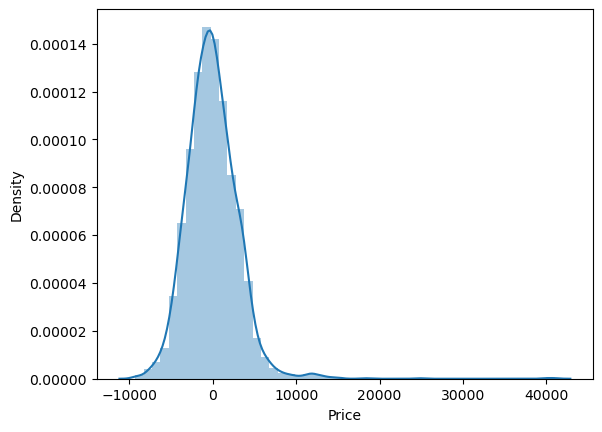

In [256]:
sns.distplot(y_test-y_pred)

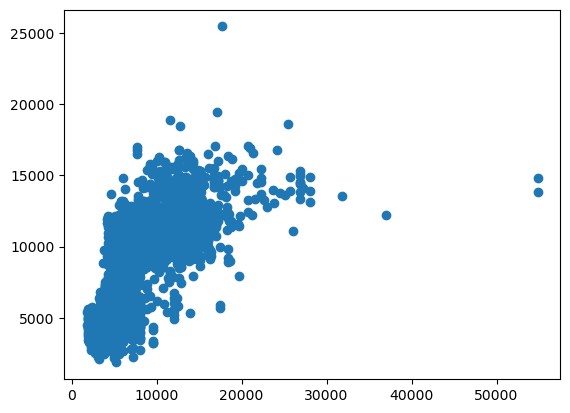

In [257]:
plt.scatter(y_test,y_pred)

In [258]:
from sklearn import metrics

In [259]:
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE:  2301.425673217355
MSE:  9967909.820083752
RMSE:  47.97317660127746


## Ridge Regression

In [260]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ri_reg =Ridge()

In [261]:
parameters = {'alpha':[0.4,0.6,0.004,0.003,0.0004,0.07,3,0.005]}
ri_model = GridSearchCV(estimator=ri_reg,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')

In [262]:
ri_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.4, 0.6, 0.004, 0.003, 0.0004, 0.07, 3,
                                   0.005]},
             scoring='neg_mean_squared_error')

In [263]:
print(ri_model.best_params_)
print(ri_model.best_score_)

{'alpha': 3}
-11029404.796955282


In [265]:
print('MSE for train set is: {}'.format(ri_model.score(X_train,y_train)))
print('MSE for train set is: {}'.format(ri_model.score(X_test,y_test)))

MSE for train set is: -10972345.183896886
MSE for train set is: -9967976.7736042


In [267]:
ri_model.score(X_train,y_train)

-10972345.183896886

In [268]:
rid_pred = ri_model.predict(X_test)

C:\Users\ssart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

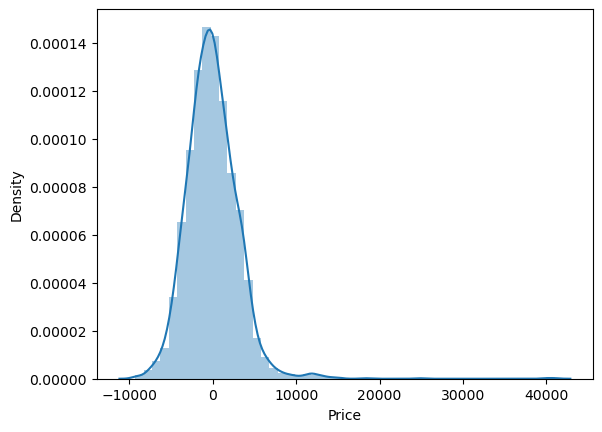

In [269]:
sns.distplot(y_test-rid_pred)

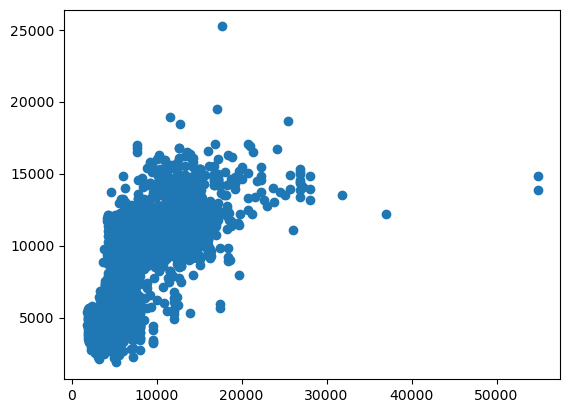

In [270]:
plt.scatter(y_test,rid_pred)

In [271]:
print('MAE: ', metrics.mean_absolute_error(y_test,rid_pred))
print('MSE: ', metrics.mean_squared_error(y_test,rid_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test,rid_pred)))

MAE:  2301.2842068483624
MSE:  9967976.7736042
RMSE:  47.9717021466652


## Lasso Regression

In [272]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
la_reg = Lasso()

In [273]:
para =  {'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [303]:
las_model = RandomizedSearchCV(la_reg,para,cv=10,scoring='neg_mean_squared_error')

In [304]:
las_model.fit(X_train,y_train)

C:\Users\ssart\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.696e+10, tolerance: 1.462e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\ssart\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.538e+10, tolerance: 1.424e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\ssart\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.755e+10, toleranc

RandomizedSearchCV(cv=10, estimator=Lasso(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40]},
                   scoring='neg_mean_squared_error')

In [276]:
las_model.best_params_ , las_model.best_score_

({'alpha': 5}, -11028656.421241868)

In [277]:
las_pred = las_model.predict(X_test)

C:\Users\ssart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

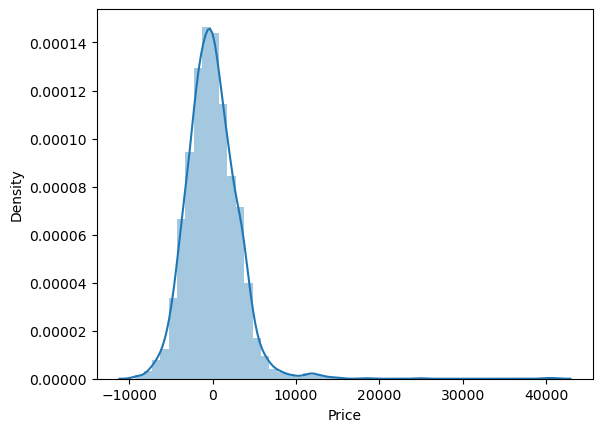

In [278]:
sns.distplot(y_test-las_pred)

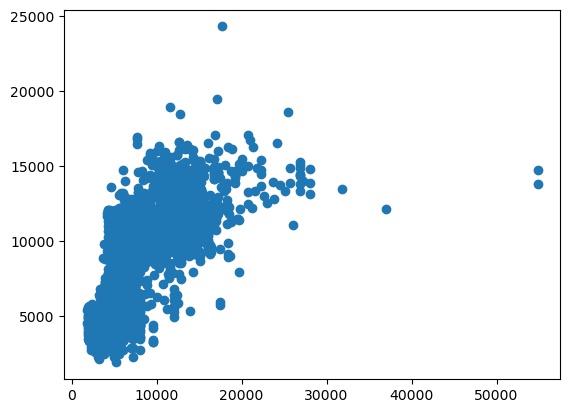

In [279]:
plt.scatter(y_test,las_pred)

In [280]:
print('MAE: ', metrics.mean_absolute_error(y_test,las_pred))
print('MSE: ', metrics.mean_squared_error(y_test,las_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test,las_pred)))

MAE:  2299.6809118023066
MSE:  9964707.997635374
RMSE:  47.954988393308014


## Decision Tree Regressor

In [281]:
from sklearn.tree import DecisionTreeRegressor

In [282]:
dt_reg = DecisionTreeRegressor()

In [283]:
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [284]:
dt_reg.score(X_train,y_train),dt_reg.score(X_test,y_test)

(0.9960254535763625, 0.7939295118510485)

In [285]:
score = cross_val_score(dt_reg,X_train,y_train,cv=5)

In [286]:
score.mean()

0.7906913419726144

In [287]:
dt_pred = dt_reg.predict(X_test)

C:\Users\ssart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

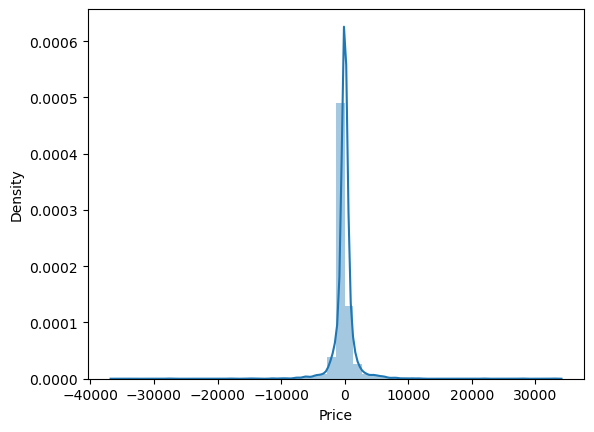

In [288]:
sns.distplot(y_test-dt_pred)

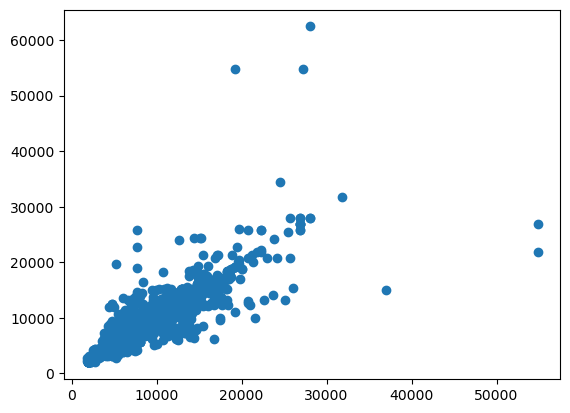

In [289]:
plt.scatter(y_test,dt_pred)

In [290]:
print('MAE ', metrics.mean_absolute_error(y_test,dt_pred))
print('MSE ', metrics.mean_squared_error(y_test,dt_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

MAE  741.7314092563702
MSE  4174256.651681401
RMSE  2043.099765474364


### Hyperparameter optimization

In [291]:
params = {"splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]}


In [292]:
dtree_reg = GridSearchCV(dt_reg,params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3)

In [293]:
def time(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour,tsec = div_mod((datetime.now() - start_time).total_seconds(),3600)
        tmin,tsec = divmod(tsec,60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [294]:
from datetime import datetime
start_time = None
dtree_reg.fit(X_train,y_train)
time(start_time)

Fitting 5 folds for each of 10240 candidates, totalling 51200 fits


datetime.datetime(2023, 8, 13, 11, 37, 34, 101740)

In [295]:
dtree_reg.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [296]:
dtree_reg.best_score_

-9934384.977688499

In [297]:
dtree_pred =dtree_reg.predict(X_test)

In [298]:
dtree_reg.score(X_train,y_train),dtree_reg.score(X_test,y_test)

(-10048828.393485753, -9058290.813630393)

C:\Users\ssart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

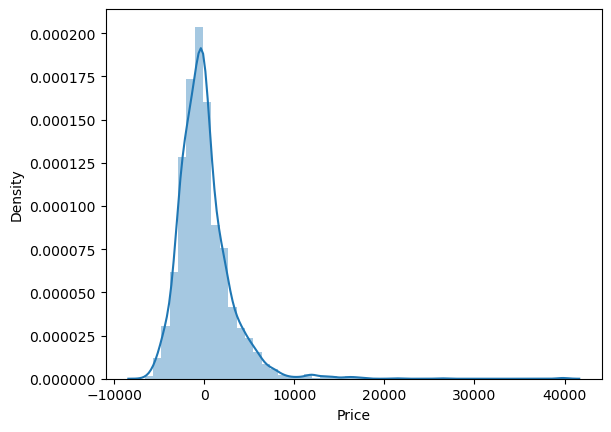

In [299]:
sns.distplot(y_test-dtree_pred)

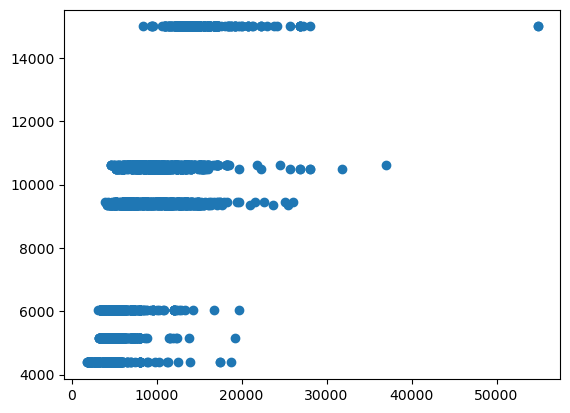

In [300]:
plt.scatter(y_test,dtree_pred)

In [301]:
print('MAE ', metrics.mean_absolute_error(y_test,dtree_pred))
print('MSE ', metrics.mean_squared_error(y_test,dtree_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,dtree_pred)))

MAE  2024.8534495266879
MSE  9058290.813630393
RMSE  3009.6994556982586


In [302]:
##conda install pydotplus
## conda install python-graphviz

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [ ]:
features = list(X_train.columns)
features

In [ ]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [ ]:
dot_data = StringIO()  
export_graphviz(dt_reg, out_file=dot_data,feature_names=features,filled=True,rounded=True,max_depth=5)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Random Forest

In [305]:
from sklearn.ensemble import RandomForestRegressor

In [306]:
rf_reg = RandomForestRegressor()

In [307]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [308]:
rf_reg.score(X_train,y_train),rf_reg.score(X_test,y_test)

(0.9808789111777175, 0.8732966681573078)

In [309]:
rf_pred = rf_reg.predict(X_test)

C:\Users\ssart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

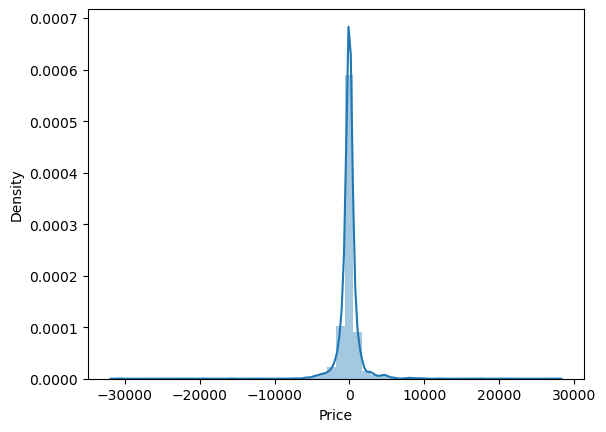

In [310]:
sns.distplot(y_test-rf_pred)

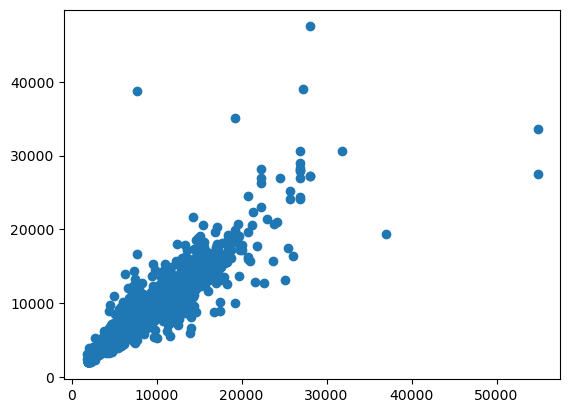

In [311]:
plt.scatter(y_test,rf_pred)

In [312]:
print('MAE ', metrics.mean_absolute_error(y_test,rf_pred))
print('MSE ', metrics.mean_squared_error(y_test,rf_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

MAE  687.6098635987692
MSE  2566559.7751787785
RMSE  1602.048618231912


### Hyperparameter tuning

In [313]:
rf_reg.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [314]:
n_estimators = [int(i) for i in np.linspace(100,1200,num=12)]

max_depth = [int(i) for i in np.linspace(5,30,num=6)]

min_weight_fraction_leaf =[0.1,0.2,0.4,0.5,0.7,0.6]

max_features = ['auto','sqrt']

min_samples_split = [4,5,7,10,15,100]

min_samples_leaf = [1,5,7,10]

In [315]:
ran_params = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'max_features' : max_features,
             'min_samples_split': min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [316]:
rand_reg = RandomizedSearchCV(rf_reg,param_distributions=ran_params,n_iter=100,cv=5,scoring='neg_mean_squared_error',verbose=3,n_jobs=-1)

In [317]:
rand_reg.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 7, 10],
                                        'min_samples_split': [4, 5, 7, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=3)

In [318]:
rand_reg.best_params_

{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [319]:
rand_reg.best_score_

-2735293.096172898

In [320]:
rand_pred = rand_reg.predict(X_test)

C:\Users\ssart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

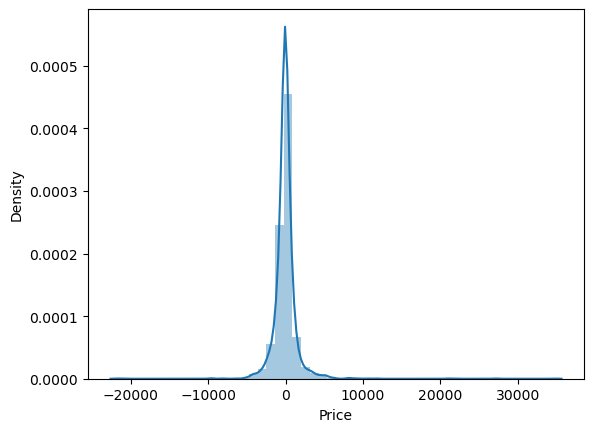

In [321]:
sns.distplot(y_test-rand_pred)

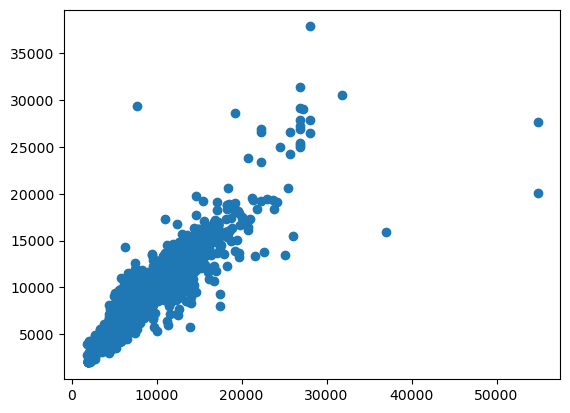

In [322]:
plt.scatter(y_test,rand_pred)

In [323]:
print('MAE ', metrics.mean_absolute_error(y_test,rand_pred))
print('MSE ', metrics.mean_squared_error(y_test,rand_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,rand_pred)))

MAE  800.6867949694517
MSE  2536789.7337044296
RMSE  1592.7302765077425


In [324]:
import xgboost as xgb

In [325]:
xg_reg = xgb.XGBRegressor()

In [326]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [327]:
xg_reg.score(X_train,y_train),xg_reg.score(X_test,y_test)

(0.9756865607436155, 0.8508604018938544)

In [328]:
xg_pred = xg_reg.predict(X_test)

C:\Users\ssart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

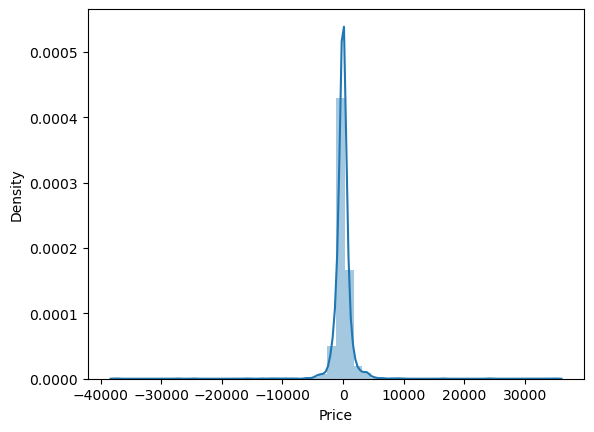

In [329]:
sns.distplot(y_test-xg_pred)

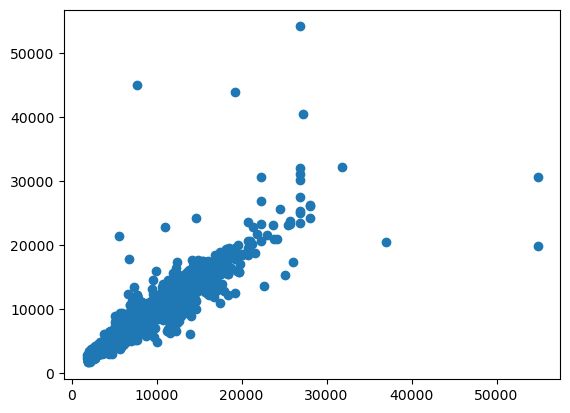

In [330]:
plt.scatter(y_test,xg_pred)

In [331]:
xg_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [332]:
n_estimators = [int(i) for i in np.linspace(100,1200,num=12)]

learning_rate = [0.2,0.3,0.4,0.5,0.6]

max_depth = [int(i) for i in np.linspace(5,40,num=8)]

min_child_weight = [3,5,6,8,7]

subsample = [0.4,0.5,0.7,0.8,0.9]

In [333]:
ran_params = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'learning_rate' : learning_rate,
             'min_child_weight': min_child_weight,
             'subsample':subsample}

In [334]:
xg_r = RandomizedSearchCV(xg_reg,ran_params,n_iter=100,scoring='neg_mean_squared_error',cv=5,verbose=3)

In [ ]:
xg_r.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END learning_rate=0.6, max_depth=40, min_child_weight=6, n_estimators=700, subsample=0.9;, score=-2746096.829 total time=  11.7s
[CV 2/5] END learning_rate=0.6, max_depth=40, min_child_weight=6, n_estimators=700, subsample=0.9;, score=-3457452.486 total time=  10.3s
[CV 3/5] END learning_rate=0.6, max_depth=40, min_child_weight=6, n_estimators=700, subsample=0.9;, score=-2381960.865 total time=  11.3s
[CV 4/5] END learning_rate=0.6, max_depth=40, min_child_weight=6, n_estimators=700, subsample=0.9;, score=-3263393.469 total time=  10.7s
[CV 5/5] END learning_rate=0.6, max_depth=40, min_child_weight=6, n_estimators=700, subsample=0.9;, score=-3319650.962 total time=  11.0s
[CV 1/5] END learning_rate=0.2, max_depth=40, min_child_weight=8, n_estimators=1100, subsample=0.7;, score=-2195849.979 total time=  11.7s
[CV 2/5] END learning_rate=0.2, max_depth=40, min_child_weight=8, n_estimators=1100, subsample=0.7;, score=-

[CV 5/5] END learning_rate=0.2, max_depth=5, min_child_weight=7, n_estimators=500, subsample=0.9;, score=-1971750.745 total time=   1.2s
[CV 1/5] END learning_rate=0.5, max_depth=30, min_child_weight=8, n_estimators=700, subsample=0.5;, score=-3493762.764 total time=   8.2s
[CV 2/5] END learning_rate=0.5, max_depth=30, min_child_weight=8, n_estimators=700, subsample=0.5;, score=-4024011.756 total time=   8.6s
[CV 3/5] END learning_rate=0.5, max_depth=30, min_child_weight=8, n_estimators=700, subsample=0.5;, score=-2888327.118 total time=   7.0s
[CV 4/5] END learning_rate=0.5, max_depth=30, min_child_weight=8, n_estimators=700, subsample=0.5;, score=-3921958.460 total time=   6.3s
[CV 5/5] END learning_rate=0.5, max_depth=30, min_child_weight=8, n_estimators=700, subsample=0.5;, score=-3295788.518 total time=   6.9s
[CV 1/5] END learning_rate=0.4, max_depth=5, min_child_weight=3, n_estimators=1200, subsample=0.9;, score=-2132119.542 total time=   3.4s
[CV 2/5] END learning_rate=0.4, max

In [ ]:
xg_r.score(X_train,y_train),xg_r.score(X_test,y_test)

In [ ]:
xg_r.best_params_ , xg_r.best_score_

In [ ]:
xg_pred = xg_r.predict(X_test)

In [ ]:
sns.distplot(y_test-xg_pred)

In [ ]:
plt.scatter(y_test,xg_pred)

In [ ]:
import pickle

In [ ]:
#saving model to disk

pickle.dump(rand_reg,open('model.pkl','wb'))

In [ ]:
#Loading model to compare results
model = pickle.load(open('model.pkl','rb'))
print(model.predict)